# Pressinõukogule esitatud kaebused 2002-2021

## https://meedialiit.ee/kaebused/

In [1]:
from estnltk import Text
import requests
from matplotlib import pyplot as plt
import pandas as pd
from tqdm import tqdm
from bs4 import BeautifulSoup
import re

In [2]:
import csv
lingid= []
with open('kaebuste_lingid.csv', 'r', encoding = 'utf-8') as f:
    reader = csv.reader(f)
    for line in reader:
        if line != []:
            lingid.append(line[0])

## Kaebuste tabeli loomine

In [3]:

headers = requests.utils.default_headers()
headers.update(
  { 'User-Agent': 'my crawler (anneliis@ut.ee) / on studying purpose', }
)
kaebused = pd.DataFrame({'#' : [], 'Kaebaja': [],'Väljaanne' : [], 'Kaebuse sisu' : [], 'Lahend' : [], 'Otsuse sisu': []})

for url in tqdm(lingid):
    try:
        data = [] 

        page = requests.get(url)

        soup = BeautifulSoup(page.content, "html.parser")
 
        HTML_data = soup.find_all("table")[0].find_all("tr")[2:] 

        for element in HTML_data: 
            sub_data = [] 
            for sub_element in element: 
                try: 
                    sub_data.append(sub_element.get_text()) 
                except: 
                    continue
            data.append(sub_data)
      
        df= pd.DataFrame(data, columns = ['#', 'Kaebaja','Väljaanne', 'Kaebuse sisu', 'Lahend', 'Otsuse sisu'])
        kaebused = kaebused.append(df)
        
    except Exception as e:
        print("Exception is :", e, url)   

  0%|                                                                                           | 0/21 [00:00<?, ?it/s]

Exception is : Failed to parse: ﻿link ﻿link


100%|██████████████████████████████████████████████████████████████████████████████████| 21/21 [00:11<00:00,  1.80it/s]


In [4]:
kaebused.head()

,#,Kaebaja,Väljaanne,Kaebuse sisu,Lahend,Otsuse sisu
0,1081,AS ATKO Bussiliinid 27.12.21,"Pärnu Postimees 07.12.21 Käre pakane viis bussid rivist välja, autoabi osutajatel käed-jalad tööd täis","Kaebaja leiab, et artikli foto on eksitav, sest jätab mulje nagu poleks ATKO buss sõita saanud.",Pressinõukogu otsus 27.01.22,"ÕIGEKSMÕISTEV: Pärnu Postimees ei eksinud ajakirjanduseetika koodeksi vastu. Pressinõukogu hinnangul ei jäta artikkel muljet, nagu oleks ATKO Bussiliinide bussidel käreda külmaga probleeme olnud. Ka pildiallkiri ütleb, et liinil nr 40 probleeme ei olnud."
1,1080,Varro Vooglaid 08.12.21,Eesti Ekspress 08.12.21 Varro Vooglaid räägib kodusõja puhkemisest,Kaebaja hinnangul jätab artikli juhtlõik temast eksitava ja pahatahtliku mulje.,Pressinõukogu otsus 27.01.22,"ÕIGEKSMÕISTEV: Ekspress ei eksinud ajakirjanduseetika koodeksi vastu. Pressinõukogu hinnangul ei ole loo juhtlõik eksitav, sest artiklis ütleb Varro Vooglaid, et on valmis oma pere kaitsmiseks sundvaktsineerimise eest relva haarama. Pressinõukogu arvates on ajakirjandusel õigus pealkirjades ja juhtlõikudes artiklid värvikamalt kokku võtta, kuid seda ei tohi teha kellegi arvelt. Antud juhul ei ole juhtlõiku värve lisades kaebajat kuritarvitatud, sest Varro Vooglaid ise toob loos vaktsineerimise temaatika sisse."
2,1079,Inge Talts 08.12.21,Hiiu Leht 03.12.21 Maksumaksjale läks Valge Ingli afäär maksma 51 000 eurot 03.12.21 Roostes Valge Ingel,"Kaebaja leiab, et artiklis ja juhtkirjas on tema kohta esitatud tõsist kriitikat, kuid sõna ei antud. Kaebaja hinnangul sisaldab artikkel eksitavat ja ebatäpset infot.",Pressinõukogu otsus 27.01.22,"TAUNIV: Hiiu Leht rikkus ajakirjanduseetika koodeksi punkti 5.1., mis näeb ette, et kui kellegi kohta avaldatakse tõsiseid süüdistusi, tuleks talle pakkuda kommentaari võimalust samas numbris. Pressinõukogu hinnangul süüdistatakse artiklis Inge Taltsi tuuliku naabrite hirmutamises ja eksitava info jagamises. Samuti rikkus leht ajakirjanduseetika koodeksi punkti 3.3., mis näeb ette, et ajakirjanik peab rangelt kinni informatsiooniallikale antud lubadustest ja väldib lubadusi, mida ta ei suuda täita. Pressinõukogu hinnangul ei pidanud ajakirjanik kinni Inge Taltsile antud lubadusest avaldada tema seisukoht järgmises artiklis."
3,1078,Monika Mustimets 06.12.21,Hiiu Leht 22.10.21 Jalutuskäik Tiit Leito elutöö varemetel,"Kaebaja ei ole rahul, et tema vastulauset ei avaldatud, kuigi artiklis esitati tema kohta süüdistusi.",Pressinõukogu otsus 27.01.22,"ÕIGEKSMÕISTEV: Hiiu Leht ei eksinud ajakirjanduseetika koodeksi vastu. Pressinõukogu hinnangul on artikkel üldisemalt maastikukaitsealast, Saarnaki hoonete kompleksi mainitakse vaid väikeses osas loost ning seejuures ei avaldatud rentniku nime. Pressinõukogu hinnangul ei esitata kaebaja kohta tõsiseid süüdistusi ja seepärast ei olnud vajadust kaebajale sõna anda."
4,1077,Anonüümne menetlus (kaebaja isik on pressinõukogule teada) 02.12.21,Õhtuleht 01.12.21,"Kaebaja leiab, et artikkel on pahatahtlik ja sisaldab valeinfot. Samuti ei ole kaebaja rahul, et teda on artiklis nimeliselt nimetatud.",Pressinõukogu otsus 27.01.2022,ÕIGEKSMÕISTEV: Õhtuleht ei rikkunud head ajakirjandustava. Pressinõukogu hinnangul kajastab artikkel kohtuotsust ja välja on jäetud eraelulised andmed.


In [5]:
kaebused.shape

(1081, 6)

## Kaebuste tabelist lahendi tulemuste eristamine

In [6]:
lahend_list = kaebused['Lahend'].to_list()
lahend_list1 = [lahend.lower() for lahend in lahend_list]

In [7]:
import pandas as pd
kuupäevad = []
lahendid = []
for otsus in lahend_list1:
    kuupäev = re.sub('[a-zöäüõ]+','' ,otsus).strip(' ') #eristatakse kuupäev
    lahend = re.sub('[0-9.]+', '', otsus).strip(' ') #eristatakse lahend
    kuupäevad.append(kuupäev) 
    lahendid.append(lahend)

In [8]:
kaebused.insert(5,'Lahendi kuupäev', kuupäevad)
kaebused.insert(6,'Lahendi tulemus', lahendid)

In [9]:
kaebused['Lahendi tulemus'].value_counts()

pressinõukogu otsus              921
tagasi lükatud                    59
tagasi võetud                     20
kokkulepe                         18
menetlus lõpetatud                13
poolte kokkulepe                  13
lahendatud                        12
lahendita                         10
kokkulepe eelmenetluse käigus      8
jäetud läbi vaatamata              2
pooled leppisid kokku              1
lõpetatud                          1
eelkokkulepe                       1
presisnõukogu otsus                1
pressinõukogu ostsus               1
Name: Lahendi tulemus, dtype: int64

In [10]:
kaebused.head()

,#,Kaebaja,Väljaanne,Kaebuse sisu,Lahend,Lahendi kuupäev,Lahendi tulemus,Otsuse sisu
0,1081,AS ATKO Bussiliinid 27.12.21,"Pärnu Postimees 07.12.21 Käre pakane viis bussid rivist välja, autoabi osutajatel käed-jalad tööd täis","Kaebaja leiab, et artikli foto on eksitav, sest jätab mulje nagu poleks ATKO buss sõita saanud.",Pressinõukogu otsus 27.01.22,27.01.22,pressinõukogu otsus,"ÕIGEKSMÕISTEV: Pärnu Postimees ei eksinud ajakirjanduseetika koodeksi vastu. Pressinõukogu hinnangul ei jäta artikkel muljet, nagu oleks ATKO Bussiliinide bussidel käreda külmaga probleeme olnud. Ka pildiallkiri ütleb, et liinil nr 40 probleeme ei olnud."
1,1080,Varro Vooglaid 08.12.21,Eesti Ekspress 08.12.21 Varro Vooglaid räägib kodusõja puhkemisest,Kaebaja hinnangul jätab artikli juhtlõik temast eksitava ja pahatahtliku mulje.,Pressinõukogu otsus 27.01.22,27.01.22,pressinõukogu otsus,"ÕIGEKSMÕISTEV: Ekspress ei eksinud ajakirjanduseetika koodeksi vastu. Pressinõukogu hinnangul ei ole loo juhtlõik eksitav, sest artiklis ütleb Varro Vooglaid, et on valmis oma pere kaitsmiseks sundvaktsineerimise eest relva haarama. Pressinõukogu arvates on ajakirjandusel õigus pealkirjades ja juhtlõikudes artiklid värvikamalt kokku võtta, kuid seda ei tohi teha kellegi arvelt. Antud juhul ei ole juhtlõiku värve lisades kaebajat kuritarvitatud, sest Varro Vooglaid ise toob loos vaktsineerimise temaatika sisse."
2,1079,Inge Talts 08.12.21,Hiiu Leht 03.12.21 Maksumaksjale läks Valge Ingli afäär maksma 51 000 eurot 03.12.21 Roostes Valge Ingel,"Kaebaja leiab, et artiklis ja juhtkirjas on tema kohta esitatud tõsist kriitikat, kuid sõna ei antud. Kaebaja hinnangul sisaldab artikkel eksitavat ja ebatäpset infot.",Pressinõukogu otsus 27.01.22,27.01.22,pressinõukogu otsus,"TAUNIV: Hiiu Leht rikkus ajakirjanduseetika koodeksi punkti 5.1., mis näeb ette, et kui kellegi kohta avaldatakse tõsiseid süüdistusi, tuleks talle pakkuda kommentaari võimalust samas numbris. Pressinõukogu hinnangul süüdistatakse artiklis Inge Taltsi tuuliku naabrite hirmutamises ja eksitava info jagamises. Samuti rikkus leht ajakirjanduseetika koodeksi punkti 3.3., mis näeb ette, et ajakirjanik peab rangelt kinni informatsiooniallikale antud lubadustest ja väldib lubadusi, mida ta ei suuda täita. Pressinõukogu hinnangul ei pidanud ajakirjanik kinni Inge Taltsile antud lubadusest avaldada tema seisukoht järgmises artiklis."
3,1078,Monika Mustimets 06.12.21,Hiiu Leht 22.10.21 Jalutuskäik Tiit Leito elutöö varemetel,"Kaebaja ei ole rahul, et tema vastulauset ei avaldatud, kuigi artiklis esitati tema kohta süüdistusi.",Pressinõukogu otsus 27.01.22,27.01.22,pressinõukogu otsus,"ÕIGEKSMÕISTEV: Hiiu Leht ei eksinud ajakirjanduseetika koodeksi vastu. Pressinõukogu hinnangul on artikkel üldisemalt maastikukaitsealast, Saarnaki hoonete kompleksi mainitakse vaid väikeses osas loost ning seejuures ei avaldatud rentniku nime. Pressinõukogu hinnangul ei esitata kaebaja kohta tõsiseid süüdistusi ja seepärast ei olnud vajadust kaebajale sõna anda."
4,1077,Anonüümne menetlus (kaebaja isik on pressinõukogule teada) 02.12.21,Õhtuleht 01.12.21,"Kaebaja leiab, et artikkel on pahatahtlik ja sisaldab valeinfot. Samuti ei ole kaebaja rahul, et teda on artiklis nimeliselt nimetatud.",Pressinõukogu otsus 27.01.2022,27.01.2022,pressinõukogu otsus,ÕIGEKSMÕISTEV: Õhtuleht ei rikkunud head ajakirjandustava. Pressinõukogu hinnangul kajastab artikkel kohtuotsust ja välja on jäetud eraelulised andmed.


In [11]:
kaebused.shape

(1081, 8)

## Otsusega kaebuste eristamine: õigeksmõistev, tauniv

### Järgnevas vaadeldakse pressinõukogult otsuse saanud kaebusi

In [12]:
kaebused_otsusega = kaebused[kaebused['Lahendi tulemus'] == 'pressinõukogu otsus']

In [13]:
kaebused_otsusega.shape

(921, 8)

In [14]:
otsuse_sisu= kaebused_otsusega['Otsuse sisu'].to_list()

In [15]:
tulemus_list = []
for sonad in otsuse_sisu:
    sonad = sonad.lower()
    if 'õigeksmõistev' in sonad and 'tauniv'  in sonad:
        tulemus_list.append('topeltlahend')        
    elif 'õigeksmõistev' in sonad:
        tulemus_list.append('õigeksmõistev')        
    elif 'tauniv' in sonad:
        tulemus_list.append('tauniv')
    else: 
        tulemus_list.append('muu otsus')

In [16]:
kaebused_otsusega.insert(7,'Lahendi liik', tulemus_list)

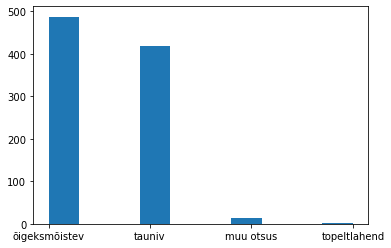

Otsuse saanud kaebuste jaotus


õigeksmõistev    487
tauniv           419
muu otsus         13
topeltlahend       2
Name: Lahendi liik, dtype: int64

In [17]:
plt.hist(kaebused_otsusega["Lahendi liik"])
plt.show()
print('Otsuse saanud kaebuste jaotus')
kaebused_otsusega['Lahendi liik'].value_counts()

### Eesti ajakirjanduseetika koodeksi punktide eristamine tekstist

### https://meedialiit.ee/eetikakoodeks/

In [18]:
koodeks = [re.findall(r'[1-6]\.[0-9]+', otsus) for otsus in otsuse_sisu]

In [19]:
kaebused_otsusega['Koodeks'] = koodeks

C:\Users\annel\anaconda3\envs\AL_keskkond\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [20]:
kaebused_otsusega

,#,Kaebaja,Väljaanne,Kaebuse sisu,Lahend,Lahendi kuupäev,Lahendi tulemus,Lahendi liik,Otsuse sisu,Koodeks
0,1081,AS ATKO Bussiliinid 27.12.21,"Pärnu Postimees 07.12.21 Käre pakane viis bussid rivist välja, autoabi osutajatel käed-jalad tööd täis","Kaebaja leiab, et artikli foto on eksitav, sest jätab mulje nagu poleks ATKO buss sõita saanud.",Pressinõukogu otsus 27.01.22,27.01.22,pressinõukogu otsus,õigeksmõistev,"ÕIGEKSMÕISTEV: Pärnu Postimees ei eksinud ajakirjanduseetika koodeksi vastu. Pressinõukogu hinnangul ei jäta artikkel muljet, nagu oleks ATKO Bussiliinide bussidel käreda külmaga probleeme olnud. Ka pildiallkiri ütleb, et liinil nr 40 probleeme ei olnud.",[]
1,1080,Varro Vooglaid 08.12.21,Eesti Ekspress 08.12.21 Varro Vooglaid räägib kodusõja puhkemisest,Kaebaja hinnangul jätab artikli juhtlõik temast eksitava ja pahatahtliku mulje.,Pressinõukogu otsus 27.01.22,27.01.22,pressinõukogu otsus,õigeksmõistev,"ÕIGEKSMÕISTEV: Ekspress ei eksinud ajakirjanduseetika koodeksi vastu. Pressinõukogu hinnangul ei ole loo juhtlõik eksitav, sest artiklis ütleb Varro Vooglaid, et on valmis oma pere kaitsmiseks sundvaktsineerimise eest relva haarama. Pressinõukogu arvates on ajakirjandusel õigus pealkirjades ja juhtlõikudes artiklid värvikamalt kokku võtta, kuid seda ei tohi teha kellegi arvelt. Antud juhul ei ole juhtlõiku värve lisades kaebajat kuritarvitatud, sest Varro Vooglaid ise toob loos vaktsineerimise temaatika sisse.",[]
2,1079,Inge Talts 08.12.21,Hiiu Leht 03.12.21 Maksumaksjale läks Valge Ingli afäär maksma 51 000 eurot 03.12.21 Roostes Valge Ingel,"Kaebaja leiab, et artiklis ja juhtkirjas on tema kohta esitatud tõsist kriitikat, kuid sõna ei antud. Kaebaja hinnangul sisaldab artikkel eksitavat ja ebatäpset infot.",Pressinõukogu otsus 27.01.22,27.01.22,pressinõukogu otsus,tauniv,"TAUNIV: Hiiu Leht rikkus ajakirjanduseetika koodeksi punkti 5.1., mis näeb ette, et kui kellegi kohta avaldatakse tõsiseid süüdistusi, tuleks talle pakkuda kommentaari võimalust samas numbris. Pressinõukogu hinnangul süüdistatakse artiklis Inge Taltsi tuuliku naabrite hirmutamises ja eksitava info jagamises. Samuti rikkus leht ajakirjanduseetika koodeksi punkti 3.3., mis näeb ette, et ajakirjanik peab rangelt kinni informatsiooniallikale antud lubadustest ja väldib lubadusi, mida ta ei suuda täita. Pressinõukogu hinnangul ei pidanud ajakirjanik kinni Inge Taltsile antud lubadusest avaldada tema seisukoht järgmises artiklis.","[5.1, 3.3]"
3,1078,Monika Mustimets 06.12.21,Hiiu Leht 22.10.21 Jalutuskäik Tiit Leito elutöö varemetel,"Kaebaja ei ole rahul, et tema vastulauset ei avaldatud, kuigi artiklis esitati tema kohta süüdistusi.",Pressinõukogu otsus 27.01.22,27.01.22,pressinõukogu otsus,õigeksmõistev,"ÕIGEKSMÕISTEV: Hiiu Leht ei eksinud ajakirjanduseetika koodeksi vastu. Pressinõukogu hinnangul on artikkel üldisemalt maastikukaitsealast, Saarnaki hoonete kompleksi mainitakse vaid väikeses osas loost ning seejuures ei avaldatud rentniku nime. Pressinõukogu hinnangul ei esitata kaebaja kohta tõsiseid süüdistusi ja seepärast ei olnud vajadust kaebajale sõna anda.",[]
4,1077,Anonüümne menetlus (kaebaja isik on pressinõukogule teada) 02.12.21,Õhtuleht 01.12.21,"Kaebaja leiab, et artikkel on pahatahtlik ja sisaldab valeinfot. Samuti ei ole kaebaja rahul, et teda on artiklis nimeliselt nimetatud.",Pressinõukogu otsus 27.01.2022,27.01.2022,pressinõukogu otsus,õigeksmõistev,ÕIGEKSMÕISTEV: Õhtuleht ei rikkunud head ajakirjandustava. Pressinõukogu hinnangul kajastab artikkel kohtuotsust ja välja on jäetud eraelulised andmed.,[]
...,...,...,...,...,...,...,...,...,...,...
8,6,Kalle Vellevoog 04.12.02,"Virumaa Teataja 23.10.02 ""Selja hakkab uut sängi otsima""","Kaebaja väitel levitab ajaleht kaebaja Karepal asuvast majast kirjutades juba pikemat aega väärinfot, mis on tekitanud moraalset kahju kaebaja perekonnale. Kaebaja pole rahul ka tema vastuväidete avaldamata jätmisega.",Pressinõukogu otsus 16.01.03,16.01.03,pressinõukogu otsus,õigeksmõistev,"ÕIGEKSMÕIS

### Järgnevalt vaatleme kas õigeksmõistva või tauniva otsuse saanud kaebusi

In [21]:
data = kaebused_otsusega[(kaebused_otsusega['Lahendi liik']=='õigeksmõistev') |(kaebused_otsusega['Lahendi liik']=='tauniv')]

In [22]:
data.head()

,#,Kaebaja,Väljaanne,Kaebuse sisu,Lahend,Lahendi kuupäev,Lahendi tulemus,Lahendi liik,Otsuse sisu,Koodeks
0,1081,AS ATKO Bussiliinid 27.12.21,"Pärnu Postimees 07.12.21 Käre pakane viis bussid rivist välja, autoabi osutajatel käed-jalad tööd täis","Kaebaja leiab, et artikli foto on eksitav, sest jätab mulje nagu poleks ATKO buss sõita saanud.",Pressinõukogu otsus 27.01.22,27.01.22,pressinõukogu otsus,õigeksmõistev,"ÕIGEKSMÕISTEV: Pärnu Postimees ei eksinud ajakirjanduseetika koodeksi vastu. Pressinõukogu hinnangul ei jäta artikkel muljet, nagu oleks ATKO Bussiliinide bussidel käreda külmaga probleeme olnud. Ka pildiallkiri ütleb, et liinil nr 40 probleeme ei olnud.",[]
1,1080,Varro Vooglaid 08.12.21,Eesti Ekspress 08.12.21 Varro Vooglaid räägib kodusõja puhkemisest,Kaebaja hinnangul jätab artikli juhtlõik temast eksitava ja pahatahtliku mulje.,Pressinõukogu otsus 27.01.22,27.01.22,pressinõukogu otsus,õigeksmõistev,"ÕIGEKSMÕISTEV: Ekspress ei eksinud ajakirjanduseetika koodeksi vastu. Pressinõukogu hinnangul ei ole loo juhtlõik eksitav, sest artiklis ütleb Varro Vooglaid, et on valmis oma pere kaitsmiseks sundvaktsineerimise eest relva haarama. Pressinõukogu arvates on ajakirjandusel õigus pealkirjades ja juhtlõikudes artiklid värvikamalt kokku võtta, kuid seda ei tohi teha kellegi arvelt. Antud juhul ei ole juhtlõiku värve lisades kaebajat kuritarvitatud, sest Varro Vooglaid ise toob loos vaktsineerimise temaatika sisse.",[]
2,1079,Inge Talts 08.12.21,Hiiu Leht 03.12.21 Maksumaksjale läks Valge Ingli afäär maksma 51 000 eurot 03.12.21 Roostes Valge Ingel,"Kaebaja leiab, et artiklis ja juhtkirjas on tema kohta esitatud tõsist kriitikat, kuid sõna ei antud. Kaebaja hinnangul sisaldab artikkel eksitavat ja ebatäpset infot.",Pressinõukogu otsus 27.01.22,27.01.22,pressinõukogu otsus,tauniv,"TAUNIV: Hiiu Leht rikkus ajakirjanduseetika koodeksi punkti 5.1., mis näeb ette, et kui kellegi kohta avaldatakse tõsiseid süüdistusi, tuleks talle pakkuda kommentaari võimalust samas numbris. Pressinõukogu hinnangul süüdistatakse artiklis Inge Taltsi tuuliku naabrite hirmutamises ja eksitava info jagamises. Samuti rikkus leht ajakirjanduseetika koodeksi punkti 3.3., mis näeb ette, et ajakirjanik peab rangelt kinni informatsiooniallikale antud lubadustest ja väldib lubadusi, mida ta ei suuda täita. Pressinõukogu hinnangul ei pidanud ajakirjanik kinni Inge Taltsile antud lubadusest avaldada tema seisukoht järgmises artiklis.","[5.1, 3.3]"
3,1078,Monika Mustimets 06.12.21,Hiiu Leht 22.10.21 Jalutuskäik Tiit Leito elutöö varemetel,"Kaebaja ei ole rahul, et tema vastulauset ei avaldatud, kuigi artiklis esitati tema kohta süüdistusi.",Pressinõukogu otsus 27.01.22,27.01.22,pressinõukogu otsus,õigeksmõistev,"ÕIGEKSMÕISTEV: Hiiu Leht ei eksinud ajakirjanduseetika koodeksi vastu. Pressinõukogu hinnangul on artikkel üldisemalt maastikukaitsealast, Saarnaki hoonete kompleksi mainitakse vaid väikeses osas loost ning seejuures ei avaldatud rentniku nime. Pressinõukogu hinnangul ei esitata kaebaja kohta tõsiseid süüdistusi ja seepärast ei olnud vajadust kaebajale sõna anda.",[]
4,1077,Anonüümne menetlus (kaebaja isik on pressinõukogule teada) 02.12.21,Õhtuleht 01.12.21,"Kaebaja leiab, et artikkel on pahatahtlik ja sisaldab valeinfot. Samuti ei ole kaebaja rahul, et teda on artiklis nimeliselt nimetatud.",Pressinõukogu otsus 27.01.2022,27.01.2022,pressinõukogu otsus,õigeksmõistev,ÕIGEKSMÕISTEV: Õhtuleht ei rikkunud head ajakirjandustava. Pressinõukogu hinnangul kajastab artikkel kohtuotsust ja välja on jäetud eraelulised andmed.,[]


In [23]:
del data['Kaebaja']
del data['Lahend']
del data['Lahendi tulemus']

In [24]:
data.shape

(906, 7)

In [25]:
data.head()

,#,Väljaanne,Kaebuse sisu,Lahendi kuupäev,Lahendi liik,Otsuse sisu,Koodeks
0,1081,"Pärnu Postimees 07.12.21 Käre pakane viis bussid rivist välja, autoabi osutajatel käed-jalad tööd täis","Kaebaja leiab, et artikli foto on eksitav, sest jätab mulje nagu poleks ATKO buss sõita saanud.",27.01.22,õigeksmõistev,"ÕIGEKSMÕISTEV: Pärnu Postimees ei eksinud ajakirjanduseetika koodeksi vastu. Pressinõukogu hinnangul ei jäta artikkel muljet, nagu oleks ATKO Bussiliinide bussidel käreda külmaga probleeme olnud. Ka pildiallkiri ütleb, et liinil nr 40 probleeme ei olnud.",[]
1,1080,Eesti Ekspress 08.12.21 Varro Vooglaid räägib kodusõja puhkemisest,Kaebaja hinnangul jätab artikli juhtlõik temast eksitava ja pahatahtliku mulje.,27.01.22,õigeksmõistev,"ÕIGEKSMÕISTEV: Ekspress ei eksinud ajakirjanduseetika koodeksi vastu. Pressinõukogu hinnangul ei ole loo juhtlõik eksitav, sest artiklis ütleb Varro Vooglaid, et on valmis oma pere kaitsmiseks sundvaktsineerimise eest relva haarama. Pressinõukogu arvates on ajakirjandusel õigus pealkirjades ja juhtlõikudes artiklid värvikamalt kokku võtta, kuid seda ei tohi teha kellegi arvelt. Antud juhul ei ole juhtlõiku värve lisades kaebajat kuritarvitatud, sest Varro Vooglaid ise toob loos vaktsineerimise temaatika sisse.",[]
2,1079,Hiiu Leht 03.12.21 Maksumaksjale läks Valge Ingli afäär maksma 51 000 eurot 03.12.21 Roostes Valge Ingel,"Kaebaja leiab, et artiklis ja juhtkirjas on tema kohta esitatud tõsist kriitikat, kuid sõna ei antud. Kaebaja hinnangul sisaldab artikkel eksitavat ja ebatäpset infot.",27.01.22,tauniv,"TAUNIV: Hiiu Leht rikkus ajakirjanduseetika koodeksi punkti 5.1., mis näeb ette, et kui kellegi kohta avaldatakse tõsiseid süüdistusi, tuleks talle pakkuda kommentaari võimalust samas numbris. Pressinõukogu hinnangul süüdistatakse artiklis Inge Taltsi tuuliku naabrite hirmutamises ja eksitava info jagamises. Samuti rikkus leht ajakirjanduseetika koodeksi punkti 3.3., mis näeb ette, et ajakirjanik peab rangelt kinni informatsiooniallikale antud lubadustest ja väldib lubadusi, mida ta ei suuda täita. Pressinõukogu hinnangul ei pidanud ajakirjanik kinni Inge Taltsile antud lubadusest avaldada tema seisukoht järgmises artiklis.","[5.1, 3.3]"
3,1078,Hiiu Leht 22.10.21 Jalutuskäik Tiit Leito elutöö varemetel,"Kaebaja ei ole rahul, et tema vastulauset ei avaldatud, kuigi artiklis esitati tema kohta süüdistusi.",27.01.22,õigeksmõistev,"ÕIGEKSMÕISTEV: Hiiu Leht ei eksinud ajakirjanduseetika koodeksi vastu. Pressinõukogu hinnangul on artikkel üldisemalt maastikukaitsealast, Saarnaki hoonete kompleksi mainitakse vaid väikeses osas loost ning seejuures ei avaldatud rentniku nime. Pressinõukogu hinnangul ei esitata kaebaja kohta tõsiseid süüdistusi ja seepärast ei olnud vajadust kaebajale sõna anda.",[]
4,1077,Õhtuleht 01.12.21,"Kaebaja leiab, et artikkel on pahatahtlik ja sisaldab valeinfot. Samuti ei ole kaebaja rahul, et teda on artiklis nimeliselt nimetatud.",27.01.2022,õigeksmõistev,ÕIGEKSMÕISTEV: Õhtuleht ei rikkunud head ajakirjandustava. Pressinõukogu hinnangul kajastab artikkel kohtuotsust ja välja on jäetud eraelulised andmed.,[]


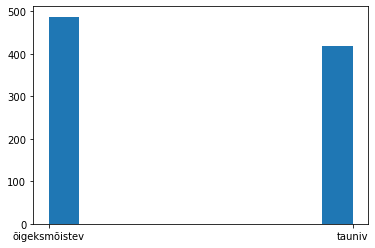

Õigeksmõistvate ja taunivate otsustega kaebuste jaotus


õigeksmõistev    487
tauniv           419
Name: Lahendi liik, dtype: int64

In [26]:
plt.hist(data["Lahendi liik"])
plt.show()
print('Õigeksmõistvate ja taunivate otsustega kaebuste jaotus')
data['Lahendi liik'].value_counts()

## Väljaande nime filtreerimine

In [27]:
tr = 'trükimeedia'
te = 'rääkiv meedia'

In [28]:
def Valjaanne (k):

    if 'Delfi' in k:
        t = ('Delfi', tr)
    elif 'Pärnu Postimees' in k:
        t = ('Pärnu Postimees', tr)
    elif 'Postimees' in k or 'Postimehe' in k:
        t = ('Postimees', tr)
    elif 'Lõuna-Eesti Postimees' in k:
        t = ('Lõuna-Eesti Postimees', tr)
    elif 'Lääne-Harju Ekspress' in k:
        t = ('Lääne-Harju Ekspress', tr)
    elif 'Eesti Ekspress' in k or ('Eesti' in k and 'Ekspress' in k):
        t = ('Eesti Ekspress', tr)  
    elif 'Eesti Päevaleht' in k or 'Eesti Päevalehe'in k or 'Eesti Päevalehe LP' in k or 'LP' in k or ('Eesti' in k and 'Päevaleht' in k):
        t = ('Eesti Päevaleht', tr)  
    elif 'Õhtuleht' in k:
        t = ('Õhtuleht', tr)
    elif 'Maaleht' in k:
        t = ('Maaleht', tr)
    elif 'Õpetajate Leht' in k or ('Õpetajate' in k and 'Leht' in k):
        t = ('Õpetajate Leht', tr)
    elif 'Äripäev' in k:
        t = ('Äripäev', tr)
    elif 'Hiiu Leht' in k  or ('Hiiu' in k and 'Leht' in k):
        t = ('Hiiu Leht', tr)
    elif 'Oma Saar' in k  or ('Oma' in k and 'Saar' in k):
        t = ('Oma Saar', tr)
    elif 'Elva Postipoiss' in k  or ('Elva' in k and 'Postipoiss' in k):
        t = ('Elva Postipoiss', tr)
    elif 'Põhjarannik' in k:
        t = ('Põhjarannik', tr)
    elif 'Vooremaa' in k:
        t = ('Vooremaa', tr)
    elif 'Sakala' in k:
        t = ('Sakala', tr)
    elif 'Valgamaalane' in k:
        t = ('Valgamaalane', tr)
    elif 'Koit' in k:
        t = ('Koit', tr)
    elif 'Kroonika' in k:
        t = ('Kroonika', tr)
    elif 'Lõuna Leht' in k or 'LõunaLeht' in k:
        t = ('LõunaLeht', tr)
    elif 'Pealinn' in k:
        t = ('Pealinn', tr)
    elif 'Sirp' in k:
        t = ('Sirp', tr)
    elif 'Müürileht' in k:
        t = ('Müürileht', tr)
    elif 'BNS' in k:
        t = ('BNS', tr)
    elif 'Eesti Kirik' in k  or ('Eesti' in k and 'Kirik' in k):
        t = ('Eesti Kirik', tr)
    elif 'Gorod' in k:
        t = ('Gorod', tr)
    elif 'Stolitsa' in k:
        t = ('Stolitsa', tr)
    elif 'Den za Dnjom' in k:
        t = ('Den za Dnjom', tr)
    elif 'MK-Estonia' in k:
        t = ('MK-Estonia', tr)
    elif 'Sõnumitooja' in k:
        t = ('Sõnumitooja', tr)
    elif 'Molodjoz Estonii' in k or ('Molodjoz' in k and 'Estonii' in k):
        t = ('Molodjoz Estonii', tr)
    elif 'Vesti Nedeli' in k or ('Vesti' in k and 'Nedeli' in k):
        t = ('Vesti Nedeli', tr)
    elif 'Sillamäeskii Vestnik' in k or ('Sillamäeskii' in k and 'Vestnik' in k):
        t = ('Sillamäeskii Vestnik', tr)
    elif 'Vesti Dnja' in k or ('Vesti' in k and 'Dnja' in k):
        t = ('Vesti Dnja', tr)
    elif 'Narvskaja Gazeta' in k or ('Narvskaja' in k and 'Gazeta' in k):
        t = ('Narvskaja Gazeta', tr)
    elif 'Delovõje Vedomosti' in k or ('Delovõje' in k and 'Vedomosti' in k):
        t = ('Delovõje Vedomosti', tr)
    elif 'Estonija' in k:
        t = ('Estonija', tr)
    elif 'Pere&Kodu' in k:
        t = ('Pere&Kodu', tr)
    elif 'Harju Elu' in k or ('Harju' in k and 'Elu' in k):
        t = ('Harju Elu', tr)  
    elif 'Lääne Elu' in k or ('Lääne' in k and 'Elu' in k):
        t = ('Lääne Elu', tr) 
    elif 'Meie Maa' in k or ('Meie' in k and 'Maa' in k):
        t = ('Meie Maa', tr) 
    elif 'Saarte Hääl' in k or ('Saarte' in k and 'Hääl' in k):
        t = ('Saarte Hääl', tr) 
    elif 'Raplamaa Sõnumid' in k or ('Raplamaa' in k and 'Sõnumid' in k):
        t = ('Meie Maa', tr) 
    elif 'Järva Teataja' in k or ('Järva' in k and 'Teataja' in k):
        t = ('Järva Teataja', tr) 
    elif 'Virumaa Teataja' in k or ('Virumaa' in k and 'Teataja' in k):
        t = ('Virumaa Teataja', tr) 
    elif 'Võrumaa Teataja' in k or ('Võrumaa' in k and 'Teataja' in k):
        t = ('Võrumaa Teataja', tr) 
    elif 'TV3' in k or ('TV' in k and '3' in k):
        t = ('TV3', te)
    elif 'Kanal2' in k or 'Kanal 2' in k or 'Kuuuurija' in k or ('Kanal' in k and '2' in k):
        t = ('Kanal2', te)
    elif 'ETV' in k or 'ERR' in k or 'ERRi' in k or 'Rahvusringhääling' in k or 'Eesti Televisioon' in k or ('Eesti' in k and 'Rahvusringhääling' in k):
        t = ('ERR', te)
    elif 'Kuku' in k or ('Kuku' in k and 'Raadio' in k):
        t = ('Kuku Raadio', te)
    elif 'Tallinna Televisioon' in k or 'Tallinna TV' in k:
        t = ('Tallinna TV', te)
    elif 'Elu24' in k:
        t = ('Elu24', tr)
    else:
        t = ('muu väljaanne', 'muu meedia')
    return t

##### Väljaande nime (kanali) ja väljaande tüübi määramine esimesel viisil

In [29]:
valjaanne = data['Väljaanne'].to_list()
valjaande_tyyp = [Valjaanne(k) for k in valjaanne]

In [30]:
Vkanal1, Vtyyp1 = map(list, zip(*valjaande_tyyp))
data['Vkanal1'] = Vkanal1
data['Vtyyp1'] = Vtyyp1

C:\Users\annel\anaconda3\envs\AL_keskkond\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\annel\anaconda3\envs\AL_keskkond\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [31]:
data.shape

(906, 9)

In [32]:
data

,#,Väljaanne,Kaebuse sisu,Lahendi kuupäev,Lahendi liik,Otsuse sisu,Koodeks,Vkanal1,Vtyyp1
0,1081,"Pärnu Postimees 07.12.21 Käre pakane viis bussid rivist välja, autoabi osutajatel käed-jalad tööd täis","Kaebaja leiab, et artikli foto on eksitav, sest jätab mulje nagu poleks ATKO buss sõita saanud.",27.01.22,õigeksmõistev,"ÕIGEKSMÕISTEV: Pärnu Postimees ei eksinud ajakirjanduseetika koodeksi vastu. Pressinõukogu hinnangul ei jäta artikkel muljet, nagu oleks ATKO Bussiliinide bussidel käreda külmaga probleeme olnud. Ka pildiallkiri ütleb, et liinil nr 40 probleeme ei olnud.",[],Pärnu Postimees,trükimeedia
1,1080,Eesti Ekspress 08.12.21 Varro Vooglaid räägib kodusõja puhkemisest,Kaebaja hinnangul jätab artikli juhtlõik temast eksitava ja pahatahtliku mulje.,27.01.22,õigeksmõistev,"ÕIGEKSMÕISTEV: Ekspress ei eksinud ajakirjanduseetika koodeksi vastu. Pressinõukogu hinnangul ei ole loo juhtlõik eksitav, sest artiklis ütleb Varro Vooglaid, et on valmis oma pere kaitsmiseks sundvaktsineerimise eest relva haarama. Pressinõukogu arvates on ajakirjandusel õigus pealkirjades ja juhtlõikudes artiklid värvikamalt kokku võtta, kuid seda ei tohi teha kellegi arvelt. Antud juhul ei ole juhtlõiku värve lisades kaebajat kuritarvitatud, sest Varro Vooglaid ise toob loos vaktsineerimise temaatika sisse.",[],Eesti Ekspress,trükimeedia
2,1079,Hiiu Leht 03.12.21 Maksumaksjale läks Valge Ingli afäär maksma 51 000 eurot 03.12.21 Roostes Valge Ingel,"Kaebaja leiab, et artiklis ja juhtkirjas on tema kohta esitatud tõsist kriitikat, kuid sõna ei antud. Kaebaja hinnangul sisaldab artikkel eksitavat ja ebatäpset infot.",27.01.22,tauniv,"TAUNIV: Hiiu Leht rikkus ajakirjanduseetika koodeksi punkti 5.1., mis näeb ette, et kui kellegi kohta avaldatakse tõsiseid süüdistusi, tuleks talle pakkuda kommentaari võimalust samas numbris. Pressinõukogu hinnangul süüdistatakse artiklis Inge Taltsi tuuliku naabrite hirmutamises ja eksitava info jagamises. Samuti rikkus leht ajakirjanduseetika koodeksi punkti 3.3., mis näeb ette, et ajakirjanik peab rangelt kinni informatsiooniallikale antud lubadustest ja väldib lubadusi, mida ta ei suuda täita. Pressinõukogu hinnangul ei pidanud ajakirjanik kinni Inge Taltsile antud lubadusest avaldada tema seisukoht järgmises artiklis.","[5.1, 3.3]",Hiiu Leht,trükimeedia
3,1078,Hiiu Leht 22.10.21 Jalutuskäik Tiit Leito elutöö varemetel,"Kaebaja ei ole rahul, et tema vastulauset ei avaldatud, kuigi artiklis esitati tema kohta süüdistusi.",27.01.22,õigeksmõistev,"ÕIGEKSMÕISTEV: Hiiu Leht ei eksinud ajakirjanduseetika koodeksi vastu. Pressinõukogu hinnangul on artikkel üldisemalt maastikukaitsealast, Saarnaki hoonete kompleksi mainitakse vaid väikeses osas loost ning seejuures ei avaldatud rentniku nime. Pressinõukogu hinnangul ei esitata kaebaja kohta tõsiseid süüdistusi ja seepärast ei olnud vajadust kaebajale sõna anda.",[],Hiiu Leht,trükimeedia
4,1077,Õhtuleht 01.12.21,"Kaebaja leiab, et artikkel on pahatahtlik ja sisaldab valeinfot. Samuti ei ole kaebaja rahul, et teda on artiklis nimeliselt nimetatud.",27.01.2022,õigeksmõistev,ÕIGEKSMÕISTEV: Õhtuleht ei rikkunud head ajakirjandustava. Pressinõukogu hinnangul kajastab artikkel kohtuotsust ja välja on jäetud eraelulised andmed.,[],Õhtuleht,trükimeedia
...,...,...,...,...,...,...,...,...,...
7,7,"Estonija 11.11.02 ""Keemia ja elu""","Kaebaja väitel on artikkel täis faktivigu ning kahjustab otsitud negatiivsete järeldustega seetõttu ettevõtte mainet. Kaebaja pole rahul asjaoluga, et leht pole valefaktide vältimiseks pöördunud Nitroferdi juhtkonna poole.",27.02.03,tauniv,"TAUNIV: Artiklis on rikutud mitut ajakirjanduseetika koodeksi punkti, muuhulgas on läbisegi oletused ja uudised ning lehe hinnangud ei põhine kindlatel faktidel.",[],Estonija,trükimeedia
8,6,"Virumaa Teataja 23.10.02 ""Selja hakkab uut sängi otsima""","Kaebaja väitel levitab ajaleht kaebaja Karepal asuvast majast kirjutades juba pikemat aega väärinfot, mis on tekitanud moraalset kahju kaebaja perekonnale. Kaebaja pole r

#### Väljaande nime (kanali) ja väljaande tüübi määramine teisel viisil (nimeüksuste abil)

In [33]:
# Loome uue nimeüksuste tuvastaja 
from estnltk.taggers import NerTagger
ner_tagger = NerTagger()
# Milliseid kihte ner_tagger vajab?
ner_tagger.input_layers

('morph_analysis',)

In [34]:
nimed = []
from estnltk import Text

for k in valjaanne:
    t= Text(k).tag_layer('morph_analysis')

    # lisame nimeüksuste märgenduse
    ner_tagger.tag(t)
    # leia nimeüksuste liigid
    #entity_labels = t.ner[['nertag']]
    # leia nimeüksuste tekstijupid
    entity_texts = [ne.enclosing_text for ne in t.ner]
    # leia nimeüksuste asukohad
    #entity_spans = [(ne.start, ne.end) for ne in t.ner]

    # väljastab tuvastatud nimeüksused koos nende asukohtade, tekstijuppide ja liikidega:
    #for ne_phrase, ne_label, ne_span in zip(entity_texts, entity_labels, entity_spans):
        #print( ne_span, ne_phrase, ne_label )
    nimed.append(entity_texts)

In [35]:
valjaande_nimi = [Valjaanne(k) for k in nimed]

In [36]:
Vkanal2, Vtyyp2 = map(list, zip(*valjaande_nimi))
data['Vkanal2'] = Vkanal2
data['Vtyyp2'] = Vtyyp2

C:\Users\annel\anaconda3\envs\AL_keskkond\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\annel\anaconda3\envs\AL_keskkond\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [37]:
Vkanal = list(zip(Vkanal1, Vkanal2))
Vtyyp = list(zip(Vtyyp1, Vtyyp2))

In [38]:
Vnimi = []
for v in Vkanal:
    if v[1] != 'muu väljaanne':
        Vnimi.append(v[1])
    else:
        Vnimi.append(v[0])
Vliik = []
for v in Vtyyp:
    if v[1] != 'muu meedia':
        Vliik.append(v[1])
    else:
        Vliik.append(v[0])

In [39]:
data['Väljaande nimi'] = Vnimi
data['Väljaande liik'] = Vliik

C:\Users\annel\anaconda3\envs\AL_keskkond\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\annel\anaconda3\envs\AL_keskkond\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [40]:
import pandas as pd
my_crosstab = pd.crosstab(index=data["Väljaande nimi"], 
                            columns=data["Väljaande liik"],
                             margins=True)   # Include row and column totals
my_crosstab

Väljaande liik,muu meedia,rääkiv meedia,trükimeedia,All
Väljaande nimi,,,,
BNS,0,0,1,1
Delfi,0,0,87,87
Delovõje Vedomosti,0,0,4,4
Den za Dnjom,0,0,9,9
ERR,0,29,0,29
Eesti Ekspress,0,0,95,95
Eesti Kirik,0,0,1,1
Eesti Päevaleht,0,0,90,90
Elu24,0,0,6,6


In [41]:
del data['Vkanal1']
del data['Vtyyp1']
del data['Vkanal2']
del data['Vtyyp2']

In [42]:
data.shape

(906, 9)

In [43]:
data

,#,Väljaanne,Kaebuse sisu,Lahendi kuupäev,Lahendi liik,Otsuse sisu,Koodeks,Väljaande nimi,Väljaande liik
0,1081,"Pärnu Postimees 07.12.21 Käre pakane viis bussid rivist välja, autoabi osutajatel käed-jalad tööd täis","Kaebaja leiab, et artikli foto on eksitav, sest jätab mulje nagu poleks ATKO buss sõita saanud.",27.01.22,õigeksmõistev,"ÕIGEKSMÕISTEV: Pärnu Postimees ei eksinud ajakirjanduseetika koodeksi vastu. Pressinõukogu hinnangul ei jäta artikkel muljet, nagu oleks ATKO Bussiliinide bussidel käreda külmaga probleeme olnud. Ka pildiallkiri ütleb, et liinil nr 40 probleeme ei olnud.",[],Pärnu Postimees,trükimeedia
1,1080,Eesti Ekspress 08.12.21 Varro Vooglaid räägib kodusõja puhkemisest,Kaebaja hinnangul jätab artikli juhtlõik temast eksitava ja pahatahtliku mulje.,27.01.22,õigeksmõistev,"ÕIGEKSMÕISTEV: Ekspress ei eksinud ajakirjanduseetika koodeksi vastu. Pressinõukogu hinnangul ei ole loo juhtlõik eksitav, sest artiklis ütleb Varro Vooglaid, et on valmis oma pere kaitsmiseks sundvaktsineerimise eest relva haarama. Pressinõukogu arvates on ajakirjandusel õigus pealkirjades ja juhtlõikudes artiklid värvikamalt kokku võtta, kuid seda ei tohi teha kellegi arvelt. Antud juhul ei ole juhtlõiku värve lisades kaebajat kuritarvitatud, sest Varro Vooglaid ise toob loos vaktsineerimise temaatika sisse.",[],Eesti Ekspress,trükimeedia
2,1079,Hiiu Leht 03.12.21 Maksumaksjale läks Valge Ingli afäär maksma 51 000 eurot 03.12.21 Roostes Valge Ingel,"Kaebaja leiab, et artiklis ja juhtkirjas on tema kohta esitatud tõsist kriitikat, kuid sõna ei antud. Kaebaja hinnangul sisaldab artikkel eksitavat ja ebatäpset infot.",27.01.22,tauniv,"TAUNIV: Hiiu Leht rikkus ajakirjanduseetika koodeksi punkti 5.1., mis näeb ette, et kui kellegi kohta avaldatakse tõsiseid süüdistusi, tuleks talle pakkuda kommentaari võimalust samas numbris. Pressinõukogu hinnangul süüdistatakse artiklis Inge Taltsi tuuliku naabrite hirmutamises ja eksitava info jagamises. Samuti rikkus leht ajakirjanduseetika koodeksi punkti 3.3., mis näeb ette, et ajakirjanik peab rangelt kinni informatsiooniallikale antud lubadustest ja väldib lubadusi, mida ta ei suuda täita. Pressinõukogu hinnangul ei pidanud ajakirjanik kinni Inge Taltsile antud lubadusest avaldada tema seisukoht järgmises artiklis.","[5.1, 3.3]",Hiiu Leht,trükimeedia
3,1078,Hiiu Leht 22.10.21 Jalutuskäik Tiit Leito elutöö varemetel,"Kaebaja ei ole rahul, et tema vastulauset ei avaldatud, kuigi artiklis esitati tema kohta süüdistusi.",27.01.22,õigeksmõistev,"ÕIGEKSMÕISTEV: Hiiu Leht ei eksinud ajakirjanduseetika koodeksi vastu. Pressinõukogu hinnangul on artikkel üldisemalt maastikukaitsealast, Saarnaki hoonete kompleksi mainitakse vaid väikeses osas loost ning seejuures ei avaldatud rentniku nime. Pressinõukogu hinnangul ei esitata kaebaja kohta tõsiseid süüdistusi ja seepärast ei olnud vajadust kaebajale sõna anda.",[],Hiiu Leht,trükimeedia
4,1077,Õhtuleht 01.12.21,"Kaebaja leiab, et artikkel on pahatahtlik ja sisaldab valeinfot. Samuti ei ole kaebaja rahul, et teda on artiklis nimeliselt nimetatud.",27.01.2022,õigeksmõistev,ÕIGEKSMÕISTEV: Õhtuleht ei rikkunud head ajakirjandustava. Pressinõukogu hinnangul kajastab artikkel kohtuotsust ja välja on jäetud eraelulised andmed.,[],Õhtuleht,trükimeedia
...,...,...,...,...,...,...,...,...,...
7,7,"Estonija 11.11.02 ""Keemia ja elu""","Kaebaja väitel on artikkel täis faktivigu ning kahjustab otsitud negatiivsete järeldustega seetõttu ettevõtte mainet. Kaebaja pole rahul asjaoluga, et leht pole valefaktide vältimiseks pöördunud Nitroferdi juhtkonna poole.",27.02.03,tauniv,"TAUNIV: Artiklis on rikutud mitut ajakirjanduseetika koodeksi punkti, muuhulgas on läbisegi oletused ja uudised ning lehe hinnangud ei põhine kindlatel faktidel.",[],Estonija,trükimeedia
8,6,"Virumaa Teataja 23.10.02 ""Selja hakkab uut sängi otsima""","Kaebaja väitel levitab ajaleht kaebaja Karepal asuvast majast kirjutades juba pikemat aega väärinfot, mis on tekitanud moraalset kahju kaebaja perekonnale.

## Kaebuse ja otsuse sisu järgi artiklite filtreerimine

In [44]:
art = 'Artikkel'
sa = 'Saatelõik'
vi = 'Video'
re = 'Reklaam'
mu = 'Muu tüüp'

In [45]:
def Tyyp(sonad):
    
    if 'artikkel' in sonad or 'ajaleht' in sonad or 'leht' in sonad or 'kirjutis' in sonad:
        t = art
    elif 'saade' in sonad or 'saatelõik' in sonad or 'uudistesaade' in sonad:
        t = sa
    elif 'video' in sonad:
        t = vi
    elif 'reklaam' in sonad:
        t = re
    else: 
        t = mu
    return t  

In [46]:
kaebuse_sisu= data['Kaebuse sisu'].to_list()
otsuste_sisu= data['Otsuse sisu'].to_list()
artikkel_list1=[Tyyp(k) for k in kaebuse_sisu]
artikkel_list2=[Tyyp(k) for k in otsuste_sisu]
data['Väljaande tüüp1']=artikkel_list1
data['Väljaande tüüp2']=artikkel_list2

C:\Users\annel\anaconda3\envs\AL_keskkond\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
C:\Users\annel\anaconda3\envs\AL_keskkond\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [47]:
data.head()

,#,Väljaanne,Kaebuse sisu,Lahendi kuupäev,Lahendi liik,Otsuse sisu,Koodeks,Väljaande nimi,Väljaande liik,Väljaande tüüp1,Väljaande tüüp2
0,1081,"Pärnu Postimees 07.12.21 Käre pakane viis bussid rivist välja, autoabi osutajatel käed-jalad tööd täis","Kaebaja leiab, et artikli foto on eksitav, sest jätab mulje nagu poleks ATKO buss sõita saanud.",27.01.22,õigeksmõistev,"ÕIGEKSMÕISTEV: Pärnu Postimees ei eksinud ajakirjanduseetika koodeksi vastu. Pressinõukogu hinnangul ei jäta artikkel muljet, nagu oleks ATKO Bussiliinide bussidel käreda külmaga probleeme olnud. Ka pildiallkiri ütleb, et liinil nr 40 probleeme ei olnud.",[],Pärnu Postimees,trükimeedia,Muu tüüp,Artikkel
1,1080,Eesti Ekspress 08.12.21 Varro Vooglaid räägib kodusõja puhkemisest,Kaebaja hinnangul jätab artikli juhtlõik temast eksitava ja pahatahtliku mulje.,27.01.22,õigeksmõistev,"ÕIGEKSMÕISTEV: Ekspress ei eksinud ajakirjanduseetika koodeksi vastu. Pressinõukogu hinnangul ei ole loo juhtlõik eksitav, sest artiklis ütleb Varro Vooglaid, et on valmis oma pere kaitsmiseks sundvaktsineerimise eest relva haarama. Pressinõukogu arvates on ajakirjandusel õigus pealkirjades ja juhtlõikudes artiklid värvikamalt kokku võtta, kuid seda ei tohi teha kellegi arvelt. Antud juhul ei ole juhtlõiku värve lisades kaebajat kuritarvitatud, sest Varro Vooglaid ise toob loos vaktsineerimise temaatika sisse.",[],Eesti Ekspress,trükimeedia,Muu tüüp,Muu tüüp
2,1079,Hiiu Leht 03.12.21 Maksumaksjale läks Valge Ingli afäär maksma 51 000 eurot 03.12.21 Roostes Valge Ingel,"Kaebaja leiab, et artiklis ja juhtkirjas on tema kohta esitatud tõsist kriitikat, kuid sõna ei antud. Kaebaja hinnangul sisaldab artikkel eksitavat ja ebatäpset infot.",27.01.22,tauniv,"TAUNIV: Hiiu Leht rikkus ajakirjanduseetika koodeksi punkti 5.1., mis näeb ette, et kui kellegi kohta avaldatakse tõsiseid süüdistusi, tuleks talle pakkuda kommentaari võimalust samas numbris. Pressinõukogu hinnangul süüdistatakse artiklis Inge Taltsi tuuliku naabrite hirmutamises ja eksitava info jagamises. Samuti rikkus leht ajakirjanduseetika koodeksi punkti 3.3., mis näeb ette, et ajakirjanik peab rangelt kinni informatsiooniallikale antud lubadustest ja väldib lubadusi, mida ta ei suuda täita. Pressinõukogu hinnangul ei pidanud ajakirjanik kinni Inge Taltsile antud lubadusest avaldada tema seisukoht järgmises artiklis.","[5.1, 3.3]",Hiiu Leht,trükimeedia,Artikkel,Artikkel
3,1078,Hiiu Leht 22.10.21 Jalutuskäik Tiit Leito elutöö varemetel,"Kaebaja ei ole rahul, et tema vastulauset ei avaldatud, kuigi artiklis esitati tema kohta süüdistusi.",27.01.22,õigeksmõistev,"ÕIGEKSMÕISTEV: Hiiu Leht ei eksinud ajakirjanduseetika koodeksi vastu. Pressinõukogu hinnangul on artikkel üldisemalt maastikukaitsealast, Saarnaki hoonete kompleksi mainitakse vaid väikeses osas loost ning seejuures ei avaldatud rentniku nime. Pressinõukogu hinnangul ei esitata kaebaja kohta tõsiseid süüdistusi ja seepärast ei olnud vajadust kaebajale sõna anda.",[],Hiiu Leht,trükimeedia,Muu tüüp,Artikkel
4,1077,Õhtuleht 01.12.21,"Kaebaja leiab, et artikkel on pahatahtlik ja sisaldab valeinfot. Samuti ei ole kaebaja rahul, et teda on artiklis nimeliselt nimetatud.",27.01.2022,õigeksmõistev,ÕIGEKSMÕISTEV: Õhtuleht ei rikkunud head ajakirjandustava. Pressinõukogu hinnangul kajastab artikkel kohtuotsust ja välja on jäetud eraelulised andmed.,[],Õhtuleht,trükimeedia,Artikkel,Artikkel


In [48]:
data.shape

(906, 11)

In [49]:
### frequency table using crosstab()function

import pandas as pd
my_crosstab = pd.crosstab(index=data["Väljaande tüüp1"], 
                            columns=data["Väljaande tüüp2"],
                             margins=True)   # Include row and column totals
my_crosstab

Väljaande tüüp2,Artikkel,Muu tüüp,Reklaam,Saatelõik,Video,All
Väljaande tüüp1,,,,,,
Artikkel,175,246,2,4,4,431
Muu tüüp,141,273,2,10,3,429
Reklaam,0,0,3,0,0,3
Saatelõik,1,30,1,5,3,40
Video,0,1,0,0,2,3
All,317,550,8,19,12,906


In [50]:
Vt = list(zip(artikkel_list1, artikkel_list2))

In [51]:
Vn = []
for v in Vt:
    if v[0] == v[1]:
        Vn.append(v[0])
    elif v[0] == 'Muu tüüp' and v[1] != 'Muu tüüp':
        Vn.append(v[1])
    elif v[1] == 'Muu tüüp' and v[0] != 'Muu tüüp':
        Vn.append(v[0])
    else:
        Vn.append(v[0])

In [52]:
data['Väljaande tüüp']=Vn

C:\Users\annel\anaconda3\envs\AL_keskkond\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [53]:
del data['Väljaande tüüp1']
del data['Väljaande tüüp2']

In [54]:
Vs = list(zip(Vliik, Vn))

### Meedia liigi määramine

In [55]:
Vk = []
for v in Vs:
    if v[0] == tr and v[1]  == art:
        Vk.append(tr)
    elif v[0] == tr and v[1]  == vi:
        Vk.append(te)
    elif v[0] == tr and v[1]  == sa:
        Vk.append(te)
    elif v[0] == tr and v[1]  == re:
        Vk.append(mu)
    elif v[0] == tr and v[1]  == mu:
        Vk.append(tr)
    
    elif v[0] == te and v[1]  == art:
        Vk.append(tr)
    elif v[0] == te and v[1]  == vi:
        Vk.append(te)
    elif v[0] == te and v[1] == sa:
        Vk.append(te)
    elif v[0] == te and v[1]  == re:
        Vk.append(te)
    elif v[0] == te and v[1]  == mu:
        Vk.append(te)
    
    elif v[0] == mu and v[1] == art:
        Vk.append(tr)
    elif v[0] == mu and v[1] == vi:
        Vk.append(te)
    elif v[0] == mu and v[1] == sa:
        Vk.append(te)
    elif v[0] == mu and v[1] == re:
        Vk.append(mu)
    elif v[0] == mu and v[1] == mu:
        Vk.append(mu)
    else:
        Vk.append(mu)

In [56]:
data['Meedia liik'] = Vk

C:\Users\annel\anaconda3\envs\AL_keskkond\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [57]:
data['Meedia liik'].value_counts()

trükimeedia      767
rääkiv meedia    108
Muu tüüp          31
Name: Meedia liik, dtype: int64

In [58]:
### frequency table using crosstab()function

import pandas as pd
my_crosstab = pd.crosstab(index=data["Meedia liik"], 
                            columns=data["Väljaande liik"],
                             margins=True)   # Include row and column totals
my_crosstab

Väljaande liik,muu meedia,rääkiv meedia,trükimeedia,All
Meedia liik,,,,
Muu tüüp,27,0,4,31
rääkiv meedia,0,100,8,108
trükimeedia,0,7,760,767
All,27,107,772,906


In [60]:
trykimeedia = data[(data['Meedia liik']=='trükimeedia')]
del trykimeedia['Väljaande liik']
del trykimeedia['Väljaande tüüp']
del trykimeedia['Meedia liik']

In [61]:
trykimeedia.shape

(767, 8)

In [62]:
trykimeedia.head()

,#,Väljaanne,Kaebuse sisu,Lahendi kuupäev,Lahendi liik,Otsuse sisu,Koodeks,Väljaande nimi
0,1081,"Pärnu Postimees 07.12.21 Käre pakane viis bussid rivist välja, autoabi osutajatel käed-jalad tööd täis","Kaebaja leiab, et artikli foto on eksitav, sest jätab mulje nagu poleks ATKO buss sõita saanud.",27.01.22,õigeksmõistev,"ÕIGEKSMÕISTEV: Pärnu Postimees ei eksinud ajakirjanduseetika koodeksi vastu. Pressinõukogu hinnangul ei jäta artikkel muljet, nagu oleks ATKO Bussiliinide bussidel käreda külmaga probleeme olnud. Ka pildiallkiri ütleb, et liinil nr 40 probleeme ei olnud.",[],Pärnu Postimees
1,1080,Eesti Ekspress 08.12.21 Varro Vooglaid räägib kodusõja puhkemisest,Kaebaja hinnangul jätab artikli juhtlõik temast eksitava ja pahatahtliku mulje.,27.01.22,õigeksmõistev,"ÕIGEKSMÕISTEV: Ekspress ei eksinud ajakirjanduseetika koodeksi vastu. Pressinõukogu hinnangul ei ole loo juhtlõik eksitav, sest artiklis ütleb Varro Vooglaid, et on valmis oma pere kaitsmiseks sundvaktsineerimise eest relva haarama. Pressinõukogu arvates on ajakirjandusel õigus pealkirjades ja juhtlõikudes artiklid värvikamalt kokku võtta, kuid seda ei tohi teha kellegi arvelt. Antud juhul ei ole juhtlõiku värve lisades kaebajat kuritarvitatud, sest Varro Vooglaid ise toob loos vaktsineerimise temaatika sisse.",[],Eesti Ekspress
2,1079,Hiiu Leht 03.12.21 Maksumaksjale läks Valge Ingli afäär maksma 51 000 eurot 03.12.21 Roostes Valge Ingel,"Kaebaja leiab, et artiklis ja juhtkirjas on tema kohta esitatud tõsist kriitikat, kuid sõna ei antud. Kaebaja hinnangul sisaldab artikkel eksitavat ja ebatäpset infot.",27.01.22,tauniv,"TAUNIV: Hiiu Leht rikkus ajakirjanduseetika koodeksi punkti 5.1., mis näeb ette, et kui kellegi kohta avaldatakse tõsiseid süüdistusi, tuleks talle pakkuda kommentaari võimalust samas numbris. Pressinõukogu hinnangul süüdistatakse artiklis Inge Taltsi tuuliku naabrite hirmutamises ja eksitava info jagamises. Samuti rikkus leht ajakirjanduseetika koodeksi punkti 3.3., mis näeb ette, et ajakirjanik peab rangelt kinni informatsiooniallikale antud lubadustest ja väldib lubadusi, mida ta ei suuda täita. Pressinõukogu hinnangul ei pidanud ajakirjanik kinni Inge Taltsile antud lubadusest avaldada tema seisukoht järgmises artiklis.","[5.1, 3.3]",Hiiu Leht
3,1078,Hiiu Leht 22.10.21 Jalutuskäik Tiit Leito elutöö varemetel,"Kaebaja ei ole rahul, et tema vastulauset ei avaldatud, kuigi artiklis esitati tema kohta süüdistusi.",27.01.22,õigeksmõistev,"ÕIGEKSMÕISTEV: Hiiu Leht ei eksinud ajakirjanduseetika koodeksi vastu. Pressinõukogu hinnangul on artikkel üldisemalt maastikukaitsealast, Saarnaki hoonete kompleksi mainitakse vaid väikeses osas loost ning seejuures ei avaldatud rentniku nime. Pressinõukogu hinnangul ei esitata kaebaja kohta tõsiseid süüdistusi ja seepärast ei olnud vajadust kaebajale sõna anda.",[],Hiiu Leht
4,1077,Õhtuleht 01.12.21,"Kaebaja leiab, et artikkel on pahatahtlik ja sisaldab valeinfot. Samuti ei ole kaebaja rahul, et teda on artiklis nimeliselt nimetatud.",27.01.2022,õigeksmõistev,ÕIGEKSMÕISTEV: Õhtuleht ei rikkunud head ajakirjandustava. Pressinõukogu hinnangul kajastab artikkel kohtuotsust ja välja on jäetud eraelulised andmed.,[],Õhtuleht


## Trükitud meedias ilmunud kaebused, mis on saanud õigeksmõistva või tauniva otsuse pressinõukogu poolt

In [63]:
trykimeedia.to_csv('trykimeedia.csv',index=False)
read_file = pd.read_csv (r'trykimeedia.csv')
read_file.to_excel (r'trykimeedia.xlsx', index = None, header=True)